In [16]:
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import time
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from pyclustering.cluster.bang import bang

In [4]:
folder = 'C:\\Users\\JOinme\\Downloads\\Clustering'

In [14]:
data = pd.read_csv(folder + '\\pca.csv').drop('Unnamed: 0', axis = 1)

# Kmeans

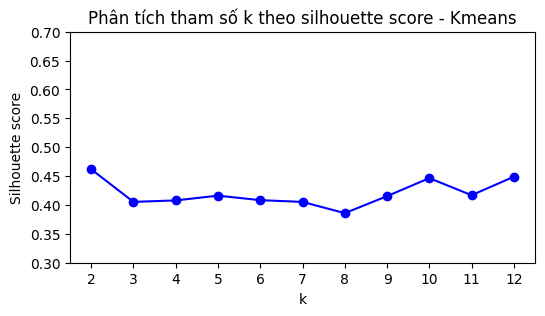

Giá trị tối ưu cho tham số: k = 2


In [17]:
## Phân tích Silhouette scores theo giá trị của tham số k
nbClusters  = range(2, 13)
silhouettes = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(data)
    silhouettes.append(silhouette_score(data, model.fit_predict(data), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Phân tích tham số k theo silhouette score - Kmeans')

plt.show()
print(f'Giá trị tối ưu cho tham số: k = {nbClusters[np.argmax(silhouettes)]}')

In [31]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)

KMeans(n_clusters=10)

# Agglomerative clustering

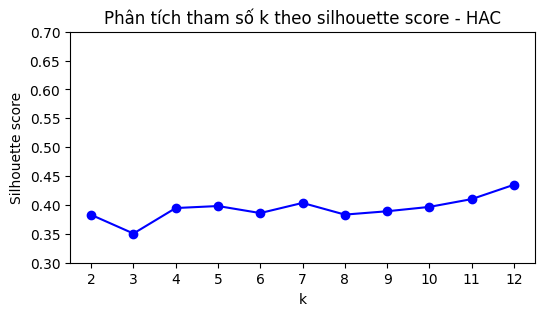

Giá trị tối ưu cho tham số: k = 12


In [19]:
## Phân tích Silhouette scores theo giá trị của tham số k
nbClusters  = range(2, 13) 
silhouettes = []
for k in nbClusters:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(data)
    silhouettes.append(silhouette_score(data, model.fit_predict(data), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Phân tích tham số k theo silhouette score - HAC')

plt.show()
print(f'Giá trị tối ưu cho tham số: k = {nbClusters[np.argmax(silhouettes)]}')

In [32]:
hac = AgglomerativeClustering(n_clusters=7)
hac.fit(data)

AgglomerativeClustering(n_clusters=7)

# Comparison

Time

In [23]:
dataset_size = np.arange(100, data.shape[0], 1000)
time_kmeans = []
time_hac = []
time_bang = []
for size in dataset_size: 
  ##Get time of BANG-clustering 
  bang_start = time.time()
  bang_time = bang(data[:size].values, levels = 11, ccore=True)
  bang_time.process()
  bang_end = time.time()
  time_bang.append(bang_end - bang_start)
  
  ##Get time of Kmeans
  kmeans_start = time.time()
  kmeans_time = KMeans(n_clusters = 10)
  kmeans_time.fit(data[:size])
  kmeans_end = time.time()
  time_kmeans.append(kmeans_end - kmeans_start)
  
  ##Get time of HAC
  hac_start = time.time()
  hac_time = AgglomerativeClustering(n_clusters = 7)
  hac_time.fit(data[:size])
  hac_end = time.time()
  time_hac.append(hac_end - hac_start)

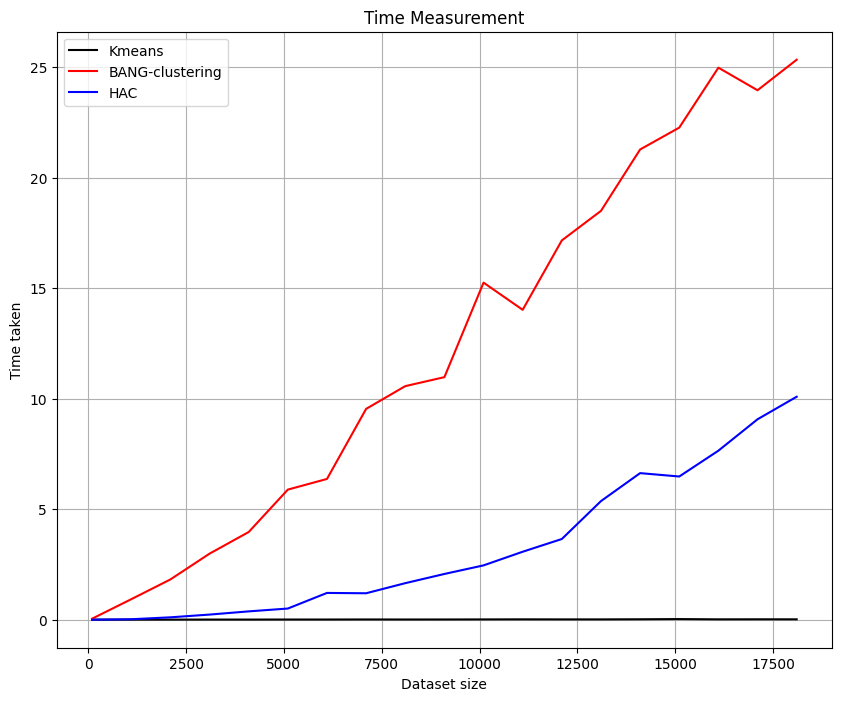

In [30]:
plt.figure(figsize = (10, 8))
plt.plot(dataset_size, time_kmeans, 'k-', label = 'Kmeans')
plt.plot(dataset_size, time_bang, 'r-', label = 'BANG-clustering')
plt.plot(dataset_size, time_hac, 'b-', label = 'HAC')
plt.legend()
plt.xlabel('Dataset size')
plt.ylabel('Time taken')
plt.title('Time Measurement')
plt.grid()
plt.show()

Silhouette Score

In [33]:
kmeans_silhouette = silhouette_score(data, kmeans.fit_predict(data))
hac_silhouette = silhouette_score(data, hac.fit_predict(data))

In [34]:
print("Kmeans silhouette score:", kmeans_silhouette)
print("Agglomerative clustering silhouette score:", hac_silhouette)

Kmeans silhouette score: 0.4578820599918975
Agglomerative clustering silhouette score: 0.40355898634603043
